<html style="background-color: white">
    <head style="background-color: white">
        <div style="position: relative; width: 1084px; margin: 50px auto; padding: 15px auto;">
            <figure style="max-width: 500px; float:left; padding: 10px; margin: 10px;">
                <a href="https://decide4ai.com/" target="_blank"><img style="padding: px; margin: 0;" src="./recursos/imagenes/FULLCOLOR.png" alt="logo decide"></a>
            </figure>
            <figure style="max-width: 500px; float:left; padding: 10px; margin: 32px 10px 10px 10px;">
                <a href="https://t3chfest.es/2023/" target="_blank"><img style="padding: 0; margin: 0;" src="./recursos/imagenes/t3f_logo.png" alt="logo t3ch festival"></a>
            </figure>
        </div>
        <div style="position: relative; border-top:3px solid #002060; border-bottom:3px solid #002060; margin-top: 300px; height: 96px; margin-right: auto; margin-left: auto;">
            <a href="./u3c1.ipynb" target="_blank"><img style="float: left; height: 64px; width: 76px;  margin:1% 1% 1% 7%;" src="./recursos/imagenes/ICON-FULLCOLOR-ROT.png" alt="icono decide4ai rotado"></a>
            <h1 style="color: #002060; text-align: center; margin: 2% 0; padding: 0; width: 70%; float: left;">
                <a href="./u3.ipynb" style="color: #002060">Unidad 3: Motores de recomendación de filtrado colaborativo</a><br><a href="./indice.ipynb" style="font-size: 10px; color: #bf27b8">Volver al índice</a>
            </h1>
            <a href="./u3c3.ipynb" target="_blank"><img style="float: left; height: 64px; width: 76px; margin:1% auto 1% 1%;" src="./recursos/imagenes/ICON-FULLCOLOR.png" alt="icono decide4ai"></a>
        </div>
        <ol style="text-align: left; list-style-type: none; margin-top: 75px;">
            <li style="margin: 20px 0;"><h5><a style="color: #f47b4c" href="./u3c1.ipynb" target="_blank"> Motores de recomendación de filtrado colaborativo basados en memoria.</a></h5></li>
            <li style="margin: 20px 0;"><h5><a style="color: #fc5100" href="./u3c2.ipynb" target="_blank"><strong>Motores de recomendación de filtrado colaborativo basados en modelos.</strong></a></h5></li>
            <li style="margin: 20px 0;"><h5><a style="color: #f47b4c" href="./u3c3.ipynb" target="_blank"> Motores de recomendación de filtrado colaborativo basados en redes neuronales.</a></h5></li>
        </ol>
    </head>
    <body>
        <h1 style="color: #fc5100; margin-top: 100px;">Motores de recomendación de filtrado colaborativo basados en modelos</h1>
        <p style="font-size: 18px; color: #002060;">
        Esta familia de motores de recomendación utilizan un enfoque que incorpora conceptos de Machine Learning. Básicamente, se crean modelos a partir de la <strong>matriz de interacción</strong> para luego realizar predicciones. Existen muchos tipos de sistemas de recomendación basados en modelos (Singular Value Decomposition, Bayesian Matrix Factorization, NNs, Autoencoders, etc.), pero aquí veremos únicamente el <strong>SVD</strong>.
        </p>
        <p style="font-size: 18px; color: #002060;">
            Pero, antes de entrar más en el algoritmo de <em>Singular Value Decomposition</em> popular gracias a Netflix, vamos a entender que conceptos de machine learning se aplican en este tipo de algoritmos.<br>
            Vamos a partir de una matriz de interacción <em>user-item</em> que vamos a denominar $R$ que tiene $M$ usuarios y $N$ productos. Esta matriz $R$ puede ser veces que ha comprado un producto, veces que ha visto una pelicula, rating de un libro, etc. La idea es descomponer esta matriz $R$ en el producto de dos sub matrices más pequeñas que puedan reconstruir la matriz original. Estas matrices más pequeñas las vamos a denominar $U$, que tiene $M$ filas y $K$ columnas, y $V$ que tiene $K$ filas y $N$ columnas. Dado que $U$ contiene las mismas filas que usuarios hay, esta matriz tiene información sobre los usuarios únicamente. Mientras que $V$ que tiene las mismas columnas que productos hay, contiene la información de los productos.
        </p>
        <p style="font-size: 18px; color: #002060;">
            Pero, ¿que es $K$? K es la dimensión del espacio en el que se reduce. Es decir, la matriz de usuarios $U$ describe a los usuarios en un espacio de variables latentes de tamaño $K$. Mientras que la matriz de productos $V$ describe a los productos en un espacio de variables latentes $K$.
        </p>
        <div style="position:relative; width: 858px; margin: 50px auto; padding: 15px auto;">
            <figure style="width: 858px; height: 450px; padding: 0 40px; margin: 0; text-align: center; color: #002060;">
                <img style="width: 850px; height: 450px; padding: 0; margin: 0;" src="./recursos/imagenes/matrix_factorization.png">
                <figcaption>Fundamentos de la factorización matricial.</figcaption>
            </figure>
        </div>
        <p style="font-size: 18px; color: #002060;">
            Esto reduce el problema de calcular un rating simplemente al producto matricial de una fila ($i$) de la matriz $U$ por un item ($j$) de la matriz $V$. Es decir, si definimos $R_{i, j}$ como el rating (real) que el usuario $i$ le da al producto $j$, ese rating se puede <u>aproximar</u> a través de $\hat{R}_{i, j} = \sum_{k=1}^{K}U_{i, k}\cdot V_{k, j}$. Y aquí es donde el machine learning aparece. ¿qué valores tienen las matrices $U$ y $V$? pues esto se hace minimizándo el error cuadrático de los ratings reales frente a los calculados a través de esas dos matrices. Es decir $err_{i, j}^2 = (R_{i, j} - \sum_{k=1}^{K}U_{i, k}\cdot V_{k, j})^2$ minimizándo ese error con un descenso del gradiente, por ejemplo, obtendríamos dos matrices $U$ y $V$ de menor dimensionalidad cuya multiplicación nos daría el rating que una persona da a un artículo dado.
        </p>
        <p style="font-size: 18px; color: #002060;">
            Esto tiene dos ventajas:
        </p>
        <ul style="text-align: left; font-size: 18px; color: #002060;">
            <li style="margin: 20px 0;">Las matrices resultantes son más pequeñas que la matriz inicial, por lo que se disminuye la carga computacional.</li>
            <li style="margin: 20px 0;">Para recomendar se calculan las similitudes sobre un espacio latente de $K$ dimensiones que contiene información que a priori no tiene porque ser trivial de usuarios o productos.</li>
        </ul>
        <h2 style="color: #f47b4c; margin-top: 100px;">Singular Value Decomposition</h2>
        <p style="font-size: 18px; color: #002060;">
            Anteriormente se ha dicho que la factorización matricial se puede hacer minimizándo el error entre el valor real y la aproximación. Sin embargo en el ágebra lineal hay métodos numéricos, que permiten descomponer una matriz en una o varias matrices más pequeñas. La descomposición LU o QR son ampliamente usadas en muchas áreas de las ciencias. Sin embargo, hay una que intrínsecamente tiene asociada una importancia a cada nueva variable que se crea de las submatrices. Y es la descomposición en valores singulares.
        </p>
        <div style="position:relative; width: 1058px; margin: 50px auto; padding: 15px auto;">
            <figure style="width: 1058px; height: 450px; padding: 0 40px; margin: 0; text-align: center; color: #002060;">
                <img style="width: 1050px; height: 450px; padding: 0; margin: 0;" src="./recursos/imagenes/svd.png">
                <figcaption><em>Singular Value Decomposition</em>.</figcaption>
            </figure>
        </div>
        <p style="font-size: 18px; color: #002060;">
            El proceso es el siguiente, la matriz $U_{M, M}$ es una matriz de usuarios que son autovectores de la matriz $R_{M, N}\cdot R_{N, M}$, estos autovectores tienen asociados unos autovalores que son los componentes singulares y están dados en la matriz $\sigma_{M, N}$ que es una matriz diagonal. Finalmente se tiene la matriz $V_{N, N}$ que se obtiene de resolver la ecuación matricial dada en la figura anterior. Esta última tiene información de los productos.<br>
            Y, ¿qué es $k$? $k$ es la elección de las top $k$ variables de la descomposición matricial asociada a los valores singurales más altos. Esta es la importancia que tiene esta descomposición, que se puede elegir un espacio latente menor al original que mantenga la mayor carga de información.<br> Existen varias maneras de saber como encontrar ese valor de $k$ optimo, tres de ellas son:
        </p>
        <ol style="text-align: left; font-size: 18px; color: #002060;">
            <li style="margin: 20px 0;"><strong>Método de la energía acumulada</strong>: En este método, se calcula la cantidad total de energía contenida en los valores singulares y se selecciona un número k de valores singulares que capturen una cierta fracción de esta energía total. Por ejemplo, se puede seleccionar el número de valores singulares que capturen el 90% de la energía total.</li>
            <li style="margin: 20px 0;"><strong>Método de la tasa de cambio de los valores singulares</strong>: En este método, se analiza la tasa de cambio de los valores singulares. Se selecciona un número k de valores singulares tal que el cambio en los valores singulares después del valor k es relativamente pequeño. Esto se hace para asegurarse de que se están seleccionando los valores singulares más significativos.</li>
            <li style="margin: 20px 0;"><strong>Método de la validación cruzada</strong>: En este método, se divide el conjunto de datos en dos partes: un conjunto de entrenamiento y un conjunto de prueba. Se entrena el modelo con diferentes valores de k y se evalúa el rendimiento del modelo en el conjunto de prueba para cada valor de k. Se selecciona el valor de k que produce el mejor rendimiento en el conjunto de prueba.</li>
        </ol>
        <h2 style="color: #f47b4c; margin-top: 100px;">Ahora es tu turno</h2>
    </body>
</html>

In [91]:
import pandas as pd
import numpy as np
import tools

from sklearn.metrics import pairwise_distances
from sklearn.decomposition import TruncatedSVD
from matplotlib import pyplot as plt
from tqdm import tqdm

# pd.set_option("display.max_columns", None)

In [3]:
configuration = tools.read_config_data()

dtypes_articles = configuration.get("DTYPES_ARTICLES")
dtypes_articles = {
    key: eval(value) if value.startswith("np") else value for key, value in dtypes_articles.items()
}

path_articles = "./recursos/datos/articles.csv"
articles = pd.read_csv(path_articles, dtype=dtypes_articles)
content_columns_all = [
    "product_type_no", "graphical_appearance_no", "colour_group_code", "index_group_no", "index_code", "section_no", "garment_group_no"
]
content_columns = [
    content_columns_all[0], content_columns_all[1], 
    content_columns_all[2], content_columns_all[3]
]
articles_content = articles[["article_id", *content_columns]]
for cc in content_columns:
    articles_content[cc] = articles_content[cc].astype(str)
articles_content_ohe = pd.get_dummies(articles_content, columns=content_columns)
articles_content_ohe = articles_content_ohe.set_index("article_id")

C:\Users\Rafael Tomé\AppData\Local\Temp\ipykernel_5548\2794431971.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_content[cc] = articles_content[cc].astype(str)


In [4]:
transactions_small_train = pd.read_csv(
    "./recursos/datos/transactions_small_train.csv", 
    dtype={
        "cid": str, 
        "article_id": str
    }
)
transactions_small_test = pd.read_csv(
    "./recursos/datos/transactions_small_test.csv", 
    dtype={
        "cid": str, 
        "article_id": str, 
        "interested": int
    }
)

In [17]:
# Vamos a transformar los datos de entrenamiento en su forma 
# de matriz de interacción.
user_item_matrix = pd.pivot_table(
    data=transactions_small_train, 
    columns="article_id", 
    index="cid", 
    aggfunc=lambda _: 1,  # <-- Esto se añade para que en las celdas aparezca un 1.
    fill_value=0
)
user_item_matrix = user_item_matrix.astype(float)
user_item_matrix.head(3)

article_id,0108775015,0108775044,0111565001,0111586001,0111593001,0120129001,0123173001,0148033001,0153115019,0153115020,...,0879248001,0879781003,0880839001,0882888002,0883024001,0883033001,0883033002,0915526001,0916468003,0918292001
cid,,,,,,,,,,,,,,,,,,,,,
0000039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# Antes de entrar a ver recomendaciones vamos a ver el espacio latente de variables
# que vamos a implementar. En la implementación del SVD de scikit-learn solo nos permite
# como máximo un número k que sea el mínimo entre el número de columnas y el número de
# registros de la matriz user-item. Es por ello que vamos a aprovechar el máximo para ver
# cuanto impactan los valores singulares.
svd = TruncatedSVD(n_components=user_item_matrix.shape[1] - 1, algorithm="arpack", tol=0)
svd.fit(user_item_matrix)

TruncatedSVD(algorithm='arpack', n_components=1316, tol=0)

In [52]:
# La matriz u se calcula de la siguiente manera
u = svd.transform(user_item_matrix)
print(f"La matriz u tiene {u.shape[0]} filas y {u.shape[1]} columnas.")

# La matriz sigma se obtiene de la siguiente manera
sigma = svd.singular_values_
print(f"La matriz $\\Sigma$ tiene {sigma.shape[0]} valores singulares.")

# La matriz v se obtiene de la siguiente manera
v = svd.components_
print(f"La matriz v tiene {v.shape[0]} filas y {v.shape[1]} columnas.")

La matriz u tiene 36816 filas y 1316 columnas.
La matriz $\Sigma$ tiene 1316 valores singulares.
La matriz v tiene 1316 filas y 1317 columnas.


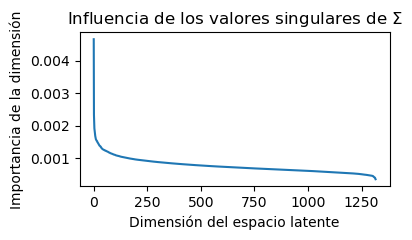

In [64]:
# Vamos a ver cuánto contribuye cada característica al total de ellas.
# Se observa que a medida que aumenta el número de dimensiones latentes
# estas impactan menos en el total.
sigma_pct = sigma / sigma.sum()
plt.figure(figsize=(4, 2))
plt.plot(sigma_pct)
plt.title("Influencia de los valores singulares de $\\Sigma$")
plt.xlabel("Dimensión del espacio latente")
plt.ylabel("Importancia de la dimensión");

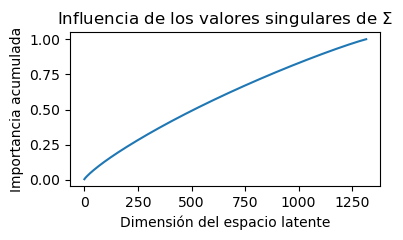

In [67]:
# Se observa que a medida que aumenta el número de dimensiones latentes
# estas explican el sumatorio total de importancia. Siendo máximo cuando
# se usan todas las dimensiones
sigma_pct_acum = np.cumsum(sigma_pct)
plt.figure(figsize=(4, 2))
plt.plot(sigma_pct_acum)
plt.title("Influencia de los valores singulares de $\\Sigma$")
plt.xlabel("Dimensión del espacio latente")
plt.ylabel("Importancia acumulada");

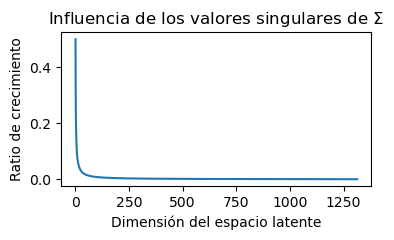

In [71]:
# Cuando se calcula el porcentaje que añade una nueva variable,
# a la explicabilidad de los valores singulares previamente
# existentes, se obtiene que a medida que se añaden variables
# estas añaden cada vez menos información.
diff_sigma_pct_acum = np.diff(sigma_pct_acum)
growth = diff_sigma_pct_acum / sigma_pct_acum[:-1]
plt.figure(figsize=(4, 2))
plt.plot(growth)
plt.title("Influencia de los valores singulares de $\\Sigma$")
plt.xlabel("Dimensión del espacio latente")
plt.ylabel("Ratio de crecimiento");

In [151]:
# STUDENT-CODE

# Con la información de las gráficas anteriores obten las matrices SVD para un
# espacio latente menor.
n_latent = 150
svd = TruncatedSVD(n_components=n_latent, algorithm="arpack", tol=0)
u = svd.fit_transform(user_item_matrix)
sigma = svd.singular_values_
v = svd.components_
print(f"La matriz u tiene {u.shape[0]} filas y {u.shape[1]} columnas.")
print(f"La matriz sigma tiene {sigma.shape[0]} valores singulares.")
print(f"La matriz v tiene {v.shape[0]} filas y {v.shape[1]} columnas.")

La matriz u tiene 36816 filas y 750 columnas.
La matriz sigma tiene 750 valores singulares.
La matriz v tiene 750 filas y 1317 columnas.


In [152]:
# STUDENT-CODE

def get_top_n_similarities(user_latent: pd.DataFrame, cid: str, n: int = 50) -> pd.DataFrame:
    """Get the top N similar users for a given user.
    
    Apply the cosine similarity to calc similarities.
    
    :param user_latent: User latent matrix.
    :param cid: Given user to calc the similarities.
    :param n: Top n users to use as similars. By default is 50.
    :return: Dataframe with the top n users similar to cid using
        cosine metrics.
    """
    
    # La funcion pairwise_distances permite calcular diferentes distancias
    # en este caso la distancia del coseno. Esta función sin embargo no devuelve
    # un resultado de similaridad, si no de des-similaridad, es por ello que
    # es necesario hacer 1 - distancia del coseno.
    cid_arr = user_latent.loc[cid].values.reshape(1, -1)
    cosine_sims = 1 - pairwise_distances(
        X=cid_arr, 
        Y=user_latent.values,
        metric="cosine"
    )
    
    # Transforma en dataframe los resultados. Y elimina la similaridad con
    # su propio usuario.
    cosine_sims_df = pd.DataFrame(
        cosine_sims, 
        index=[cid], 
        columns=user_latent.index
    )
    cosine_sims_df = cosine_sims_df.drop(columns=[cid])
    
    # Para usar el método pandas.nlargest es necesario que el formato del dataframe
    # sea column-wise y no row-wise. Por eso hay que calcularlo sobre la traspuesta.
    top_n_cosine_sims_df = cosine_sims_df.T.nlargest(n=n, columns=cid)
    top_n_cosine_sims_df = top_n_cosine_sims_df.rename(columns={cid: f"mult_{cid}"})
    return top_n_cosine_sims_df

In [154]:
# STUDENT-CODE

# Tras haber modificado la función get_top_n_similarities primero es necesario
# transformar la matriz u y v en un dataframe.
df_u = pd.DataFrame(data=u, index=user_item_matrix.index, columns=[f"k{_}" for _ in range(n_latent)])
df_v = pd.DataFrame(data=v, index=[f"k{_}" for _ in range(n_latent)], columns=user_item_matrix.columns)
# Aplica la función ahora sobre un cid específico.
top_sims = get_top_n_similarities(cid="0000039", user_latent=df_u)

In [155]:
# STUDENT-CODE

def get_top_k_recommendations(
    user_item: pd.DataFrame,
    user_latent: pd.DataFrame,
    item_latent: pd.DataFrame,
    similarities: pd.DataFrame,
    cid: str,
    k: int = 5
) -> pd.DataFrame:
    """Get top k article recommendations for a given user.
    
    :param user_item: Interaction matrix.
    :param user_latent: User latent matrix.
    :param item_latent: Item latent matrix.
    :param similarities: Dataframe with the top n users similar to cid using
        cosine metrics.
    :param cid: Given user to calc the similarities.
    :param k: Top k recommendations for the user. By default is 5.
    :return: Dataframe with k recommendation for the user.
    """
    # Filtramos los usuarios similares de la matriz de usuarios latente.
    similar_users = similarities.index.tolist()
    user_latent = user_latent[user_latent.index.isin(similar_users)]
    
    # Aprovechamos que la multiplicación de las matrices u y v dan los ratings
    # para cada usuario. Y lo transformamos en un dataframe.
    ratings = np.dot(user_latent, item_latent)
    ratings_df = pd.DataFrame(
        data=ratings,
        index=user_latent.index,
        columns=item_latent.columns
    )
    
    # Ponderamos los ratings por el factor de similaridad.
    ratings_df_sims = pd.merge(
        left=ratings_df, right=similarities, 
        left_index=True, right_index=True,
        how="inner"
    )
    ratings_df_sims_aux = ratings_df_sims[ratings_df.columns].multiply(
        ratings_df_sims[f"mult_{cid}"], axis=0
    )
    
    
    # Eliminamos los productos que el usuario ya ha comprado
    bought_items = user_item.loc[cid]
    bought_items = bought_items[bought_items == 1]
    ratings_df_sims_aux = ratings_df_sims_aux.mean().to_frame(name="rating")
    ratings_df_sims_aux = ratings_df_sims_aux[
        ~ratings_df_sims_aux.index.isin(bought_items.index)
    ]
    return ratings_df_sims_aux.nlargest(n=k, columns="rating")

In [146]:
# STUDENT-CODE

# Obten las recomendaciones para un usuario
get_top_k_recommendations(
    cid="0000039", user_latent=df_u, item_latent=df_v, 
    similarities=top_sims, user_item=user_item_matrix
)

,article_id,rating
0,0554598003,0.184016
1,0554598047,0.106072
2,0778064004,0.073968
3,0554598057,0.062167
4,0554598065,0.047142


In [156]:
# STUDENT-CODE

# Ahora vamos a ejecutar para todos los usuarios de test sobre los cuales vamos a
# calcular las métricas

dfs = []
for cid in tqdm(transactions_small_test["cid"].unique()):
    top_sims = get_top_n_similarities(cid=cid, user_latent=df_u)  # Cambiar solo esto
    recs = get_top_k_recommendations(
        cid=cid, user_latent=df_u, 
        item_latent=df_v, similarities=top_sims, 
        user_item=user_item_matrix
    )  # Cambiar solo esto
    recs = recs.reset_index(drop=False, names="article_id")
    recs["cid"] = cid
    dfs.append(recs)

100%|██████████████████████████████████████████████████████████████████████████████| 3682/3682 [12:19<00:00,  4.98it/s]


In [150]:
tools.get_metrics(
    name="CF-SVD-UserBased", recommendations=pd.concat(dfs), sort_column="rating",
    true_labels=transactions_small_test, articles_df=articles_content_ohe
)

General Precision@5            Recall@5  \
                 Catalog coverage (%)        mean       std      mean   
                                                                        
CF-SVD-UserBased                0.542    0.104889  0.140411  0.052444   

                               MAP@5           Diversity            
                       std      mean       std      mean       std  
                                                                    
CF-SVD-UserBased  0.070206  0.065455  0.108332   0.62739  0.120734

<h2 style="color: #f47b4c; margin-top: 25px;"> Conclusión</h2>
<p style="font-size: 18px; color: #002060;">
    Estos métodos tienen ventajas respecto a los <em>memory-based</em>:
<ul style="text-align: left; font-size: 18px; color: #002060;">
        <li style="margin: 20px 0;"><strong>Eficiencia</strong>: menos requisitos de espacio de memoria y menor complejidad computacional.</li>
        <li style="margin: 20px 0;"><strong>Velocidad de entrenamiento y predicción</strong>: los sistemas basados ​​en modelos suelen ser mucho más rápidos en la fase de preprocesamiento de la construcción del modelo entrenado.</li>
        <li style="margin: 20px 0;"><strong>Sobreajuste</strong>: los sistemas basados en modelos presentan menor sobreajuste que los basados en memoria. Además permiten incluir métodos de regularización.</li>
</ul>
</p>